In [1]:
from sys import path as syspath
from os import path as ospath
import pickle

syspath.append(ospath.join(ospath.expanduser("~"), 'CBSA'))

from cbsa import ReactionSystem

import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = [[1 ,-1,1,-2,0],
     [-1,-1,0,0,1],
     [0 ,0 ,1,0,-1]]

R = [[0,0,1,0,0],
     [0,0,0,0,0],
     [0,0,0,0,0]]

Y1s = 500
Y2s = 1000
Y3s = 2000
ro1 = 2000
ro2 = 50000

c1X1 = ro1/Y2s
c2 = ro2/(Y1s*Y2s)
c3X2 = (ro1+ro2)/Y1s
c4 = 2*ro1/(Y1s**2)
c5X3 = (ro1+ro2)/Y3s

x = [500,1000,2000]
k = [c1X1,c2,c3X2,c4,c5X3]

cbsa = ReactionSystem(S,R)

cbsa.setup()
cbsa.set_x(x)
cbsa.set_k(k)

In [3]:
total_sim_time = 6.0
cbsa.setup_simulation(use_opencl=False,alpha=0.5,max_dt=0.001)
cbsa.compute_simulation(total_sim_time,batch_steps=1)
cbsa_data = np.array(cbsa.simulation_data)

In [4]:
from matplotlib import rc
from mpl_toolkits import mplot3d
fontsize = 14
rc('text', usetex=True)
plt.style.use("bmh")
plt.rcParams["font.family"] = "serif"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

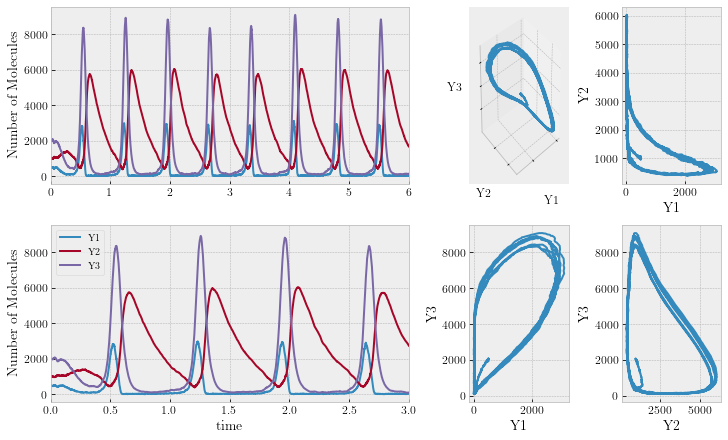

In [5]:
fig = plt.figure(figsize=(10, 6),constrained_layout=True)

gs = fig.add_gridspec(nrows=2, ncols=4)


ax0 = fig.add_subplot(gs[0:1,0:2])
ax1 = fig.add_subplot(gs[1:2,0:2])
ax2 = fig.add_subplot(gs[0:1,2:3],projection='3d')
ax3 = fig.add_subplot(gs[0:1,3:4])
ax4 = fig.add_subplot(gs[1:2,2:3])
ax5 = fig.add_subplot(gs[1:2,3:4])


ax0.plot(cbsa_data[:,0],cbsa_data[:,1],label="Y1")
ax0.plot(cbsa_data[:,0],cbsa_data[:,2],label="Y2")
ax0.plot(cbsa_data[:,0],cbsa_data[:,3],label="Y3")
ax0.set_xlim(0,6)
#ax0.set_xticklabels([])
ax0.set_ylabel("Number of Molecules",fontsize=fontsize)
#ax0.text(-0.16,0.9,r'\textbf{a)}', transform=ax0.transAxes,fontsize=18)

ax1.plot(cbsa_data[:,0],cbsa_data[:,1],label="Y1")
ax1.plot(cbsa_data[:,0],cbsa_data[:,2],label="Y2")
ax1.plot(cbsa_data[:,0],cbsa_data[:,3],label="Y3")
ax1.set_xlim(0,3)
ax1.set_ylabel("Number of Molecules",fontsize=fontsize)
ax1.set_xlabel("time",fontsize=fontsize)
ax1.legend()
#ax1.text(-0.16,0.9,r'\textbf{b)}', transform=ax1.transAxes,fontsize=18)

ax2.plot3D(cbsa_data[:,1],cbsa_data[:,2],cbsa_data[:,3])
ax2.view_init(elev=30, azim=50)
ax2.set_zlabel("Y3",fontsize=fontsize-2)
ax2.set_ylabel("Y2",fontsize=fontsize-2)
ax2.set_xlabel("Y1",fontsize=fontsize-2)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_zticklabels([])

ax3.plot(cbsa_data[:,1],cbsa_data[:,2])
ax3.set_ylabel("Y2",fontsize=fontsize)
ax3.set_xlabel("Y1",fontsize=fontsize)

ax4.plot(cbsa_data[:,1],cbsa_data[:,3])
ax4.set_ylabel("Y3",fontsize=fontsize)
ax4.set_xlabel("Y1",fontsize=fontsize)

ax5.plot(cbsa_data[:,2],cbsa_data[:,3])
ax5.set_ylabel("Y3",fontsize=fontsize)
ax5.set_xlabel("Y2",fontsize=fontsize)
plt.savefig("oregonator.png",dpi=300, bbox_inches='tight')
plt.show()